# 📓 Data Science Homework
Fill in the code blocks and markdown cells as instructed below.

## Descriptive Statistics

In [21]:
# TODO: Load the dataset and compute mean, median, mode, std, IQR
import pandas as pd
import numpy as np
df = pd.read_csv('../data/ACCIDENTS_GU_BCN_2013.csv')
victims = df['Numero de victimes'] 
print('Mean:', victims.mean())
##  etc..
import pandas as pd
import numpy as np

# Load the dataset (adjust path if needed)
df = pd.read_csv('../data/ACCIDENTS_GU_BCN_2013.csv', encoding='latin1')

# Check the column names to find the right one for 'victims'
print(df.columns)

# Assuming the column name for victims has special characters like 'Número de víctimas'
victims = df['Numero de victimes']  

# Mean
mean = victims.mean()

# Median
median = victims.median()

# Mode (returns a series, so we take the first mode)
mode = victims.mode().iloc[0]

# Standard Deviation
std = victims.std()

# Interquartile Range (IQR)
Q1 = victims.quantile(0.25)
Q3 = victims.quantile(0.75)
iqr = Q3 - Q1

# Display results
print("Mean:", mean)
print("Median:", median)
print("Mode:", mode)
print("Standard Deviation:", std)
print("IQR:", iqr) 


Mean: 1.2070424024532094
Index(['Nmero d'expedient', 'Codi districte', 'Nom districte', 'NK barri',
       'Nom barri', 'Codi carrer', 'Nom carrer', 'Num postal caption',
       'Descripciï¿½ dia setmana', 'Dia de setmana', 'Descripciï¿½ tipus dia',
       'NK Any', 'Mes de any', 'Nom mes', 'Dia de mes', 'Hora de dia',
       'Descripciï¿½ torn', 'Descripciï¿½ causa vianant', 'Nï¿½mero de morts',
       'Nï¿½mero de lesionats lleus', 'Nï¿½mero de lesionats greus',
       'Numero de victimes', 'Nï¿½mero de vehicles implicats',
       'Coordenada UTM (Y)', 'Coordenada UTM (X)'],
      dtype='object')
Mean: 1.2070424024532094
Median: 1.0
Mode: 1
Standard Deviation: 0.8005795130298843
IQR: 0.0


## Visualizations (Histogram, KDE, Boxplot, Heatmap)

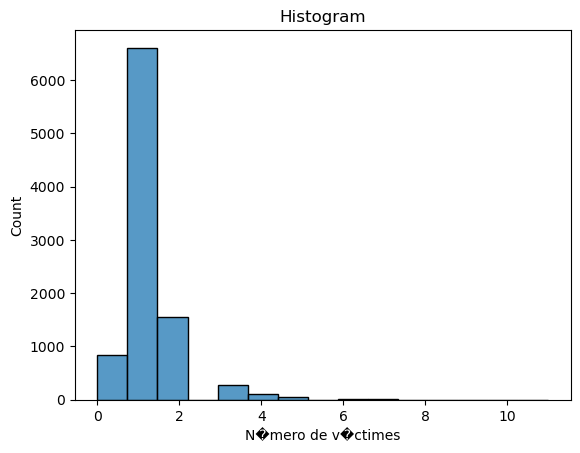

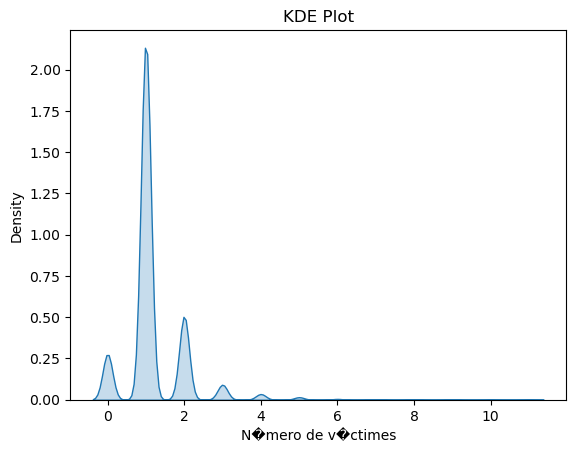

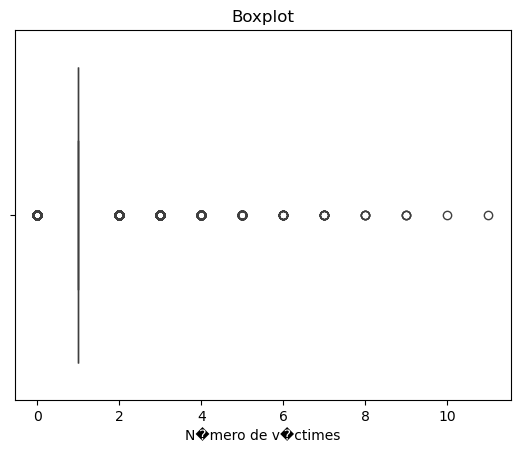

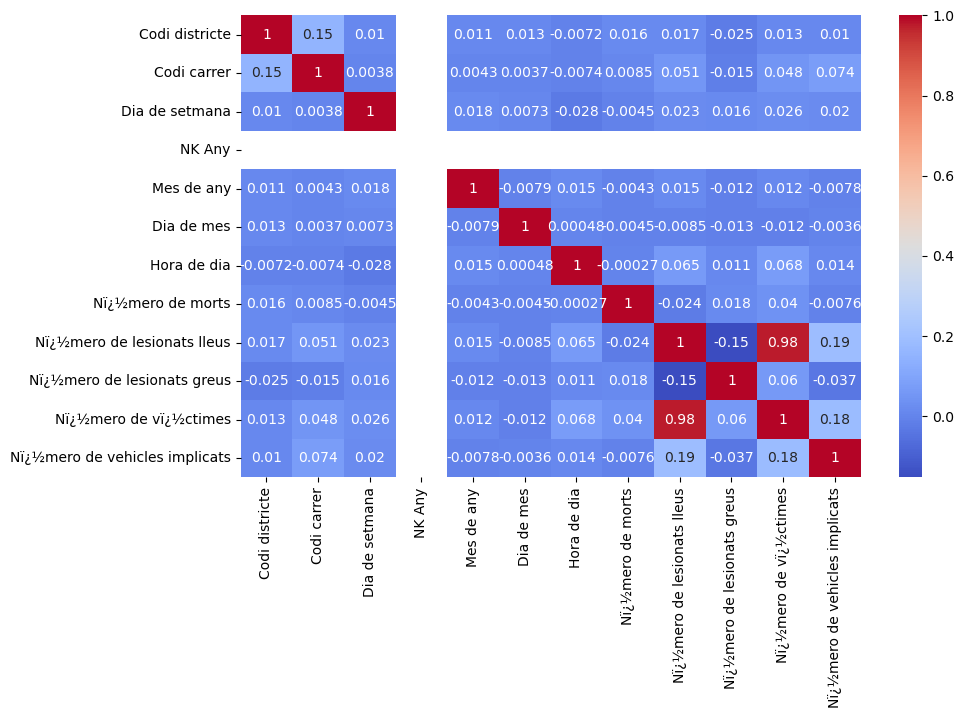

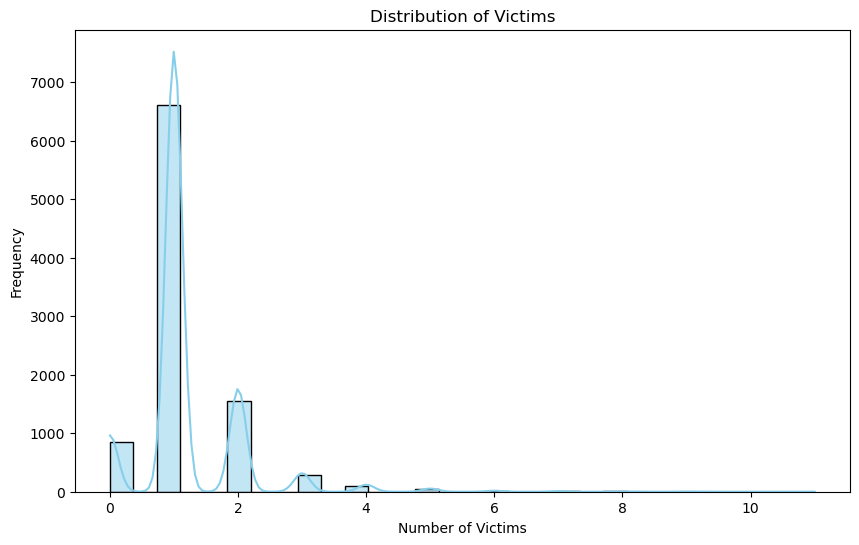

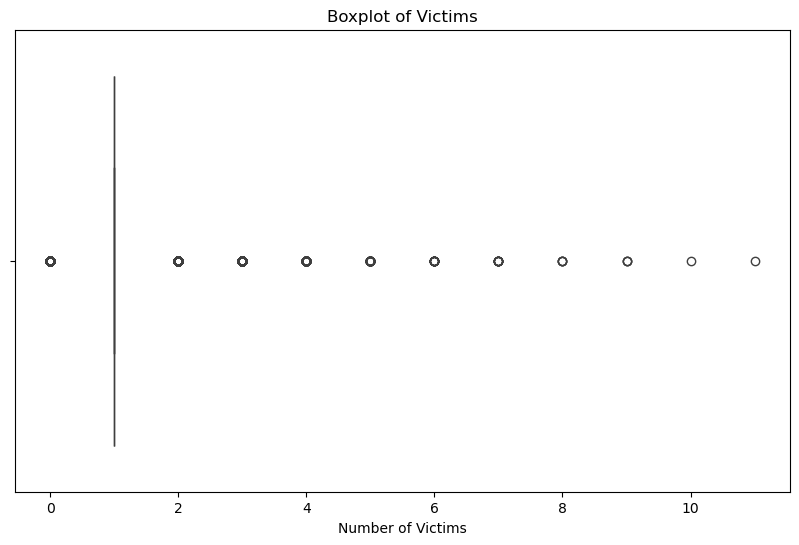

In [11]:
# TODO: Plot histogram, KDE, boxplot, and correlation heatmap
import matplotlib.pyplot as plt
import seaborn as sns
sns.histplot(victims, bins=15, kde=False)
plt.title('Histogram')
plt.show()

sns.kdeplot(victims, fill=True)
plt.title('KDE Plot')
plt.show()

sns.boxplot(x=victims)
plt.title('Boxplot')
plt.show()

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
##  etc.. 
# --- Part 4: Visualizations ---
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of the victims column with KDE
plt.figure(figsize=(10, 6))
sns.histplot(victims, kde=True, color="skyblue", bins=30)
plt.title("Distribution of Victims")
plt.xlabel("Number of Victims")
plt.ylabel("Frequency")
plt.show()

# Boxplot to visualize the spread and outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=victims)
plt.title("Boxplot of Victims")
plt.xlabel("Number of Victims")
plt.show()


## Bootstrap Confidence Interval

In [12]:
# TODO: Bootstrap sample mean and CI (e.g., for 'Número de víctimes')
boot_means = [victims.sample(frac=1, replace=True).mean() for _ in range(1000)]
ci_lower = np.percentile(boot_means, 2.5)
ci_upper = np.percentile(boot_means, 97.5)
print(f'95% CI for mean victims: ({ci_lower:.2f}, {ci_upper:.2f})') 
# --- Part 3: Bootstrap Confidence Interval ---
# Set random seed for reproducibility
np.random.seed(42)

# Number of bootstrap samples
n_iterations = 1000
sample_size = len(victims.dropna())
bootstrap_means = []

# Perform bootstrap sampling
for _ in range(n_iterations):
    sample = np.random.choice(victims.dropna(), size=sample_size, replace=True)
    bootstrap_means.append(np.mean(sample))

# Convert the list of bootstrap means to a numpy array
bootstrap_means = np.array(bootstrap_means)

# Calculate the 95% confidence interval
lower_percentile = np.percentile(bootstrap_means, 2.5)
upper_percentile = np.percentile(bootstrap_means, 97.5)

print("\nBootstrap Confidence Interval Results:")
print(f"Bootstrap 95% Confidence Interval: ({lower_percentile}, {upper_percentile})")


95% CI for mean victims: (1.19, 1.22)

Bootstrap Confidence Interval Results:
Bootstrap 95% Confidence Interval: (1.192447393465158, 1.2240668288040606)


## Hypothesis Testing

In [16]:
# TODO: Perform a t-test (e.g., is mean != 1?) and interpret the result
from scipy.stats import ttest_1samp
t_stat, p_val = ttest_1samp(victims.dropna(), popmean=1)
print(f't-statistic: {t_stat:.2f}, p-value: {p_val:.4f}')
if p_val < 0.05:
    print('Reject null hypothesis: mean is significantly different from 1')
else:
    print('Fail to reject null hypothesis') 
from scipy import stats

# --- Part 2: Hypothesis Testing ---
# Perform one-sample t-test comparing sample mean to a population mean of 5
population_mean = 5
t_stat, p_value = stats.ttest_1samp(victims.dropna(), population_mean)

# Display hypothesis test results
print("\nHypothesis Testing Results:")
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Interpretation of the result
if p_value < 0.05:
    print("Reject the null hypothesis: The mean is significantly different from 5.")
else:
    print("Fail to reject the null hypothesis: The mean is not significantly different from 5.")


t-statistic: 25.15, p-value: 0.0000
Reject null hypothesis: mean is significantly different from 1

Hypothesis Testing Results:
T-statistic: -460.7339444047845
P-value: 0.0
Reject the null hypothesis: The mean is significantly different from 5.
